<p style="font-family: Arial; font-size:3em;color:black;"> Session 4 - Lab Exercise 7</p>

In [2]:
# you can download the original Kyphosis dataset from kaggle at https://www.kaggle.com/abbasit/kyphosis-dataset?select=kyphosis.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Kyphosis_df = pd.read_csv('kyphosis.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = Kyphosis_df.drop('Kyphosis',axis=1)
y = Kyphosis_df['Kyphosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# selecting the right "parameters/hyperparameters of ML models can significantly affect their performacnce".
# let's begin exploring those parameters more for a DT model.
'''
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)
'''
# Let's consider these three parameters: criterion, splitter, min_samples_split
    # for parameters consider two cases 'gini' and 'entropy'
    # for splitter consider two cases 'best' and 'random'
    # for min_samples_split consider two cases 2 and 5
    # explain and discuss your findings

"\nDecisionTreeClassifier(\n    criterion='gini',\n    splitter='best',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_features=None,\n    random_state=None,\n    max_leaf_nodes=None,\n    min_impurity_decrease=0.0,\n    min_impurity_split=None,\n    class_weight=None,\n    presort=False,\n)\n"

In [23]:
X_train

,Age,Number,Start
33,112,3,16
29,151,2,16
27,100,3,14
67,159,4,13
40,73,5,1
49,177,2,14
44,97,3,16
38,20,6,9
64,118,4,16
46,136,4,15


In [149]:
clf = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
)

In [150]:
clf = clf.fit(X_train, y_train)

In [151]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [152]:
predictions = clf.predict(X_test)
predictions

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent'], dtype=object)

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.68

1. Changing the criterion from "gini" to "entropy" increases the accuracy but made the tree deeper and get more branches.
2. Changing the splitter from "best" to "random" increases the accuracy but made the tree deeper and get more branches.
3. Changing the min_sample_split from 2 to 5 decreased the tree nodes.

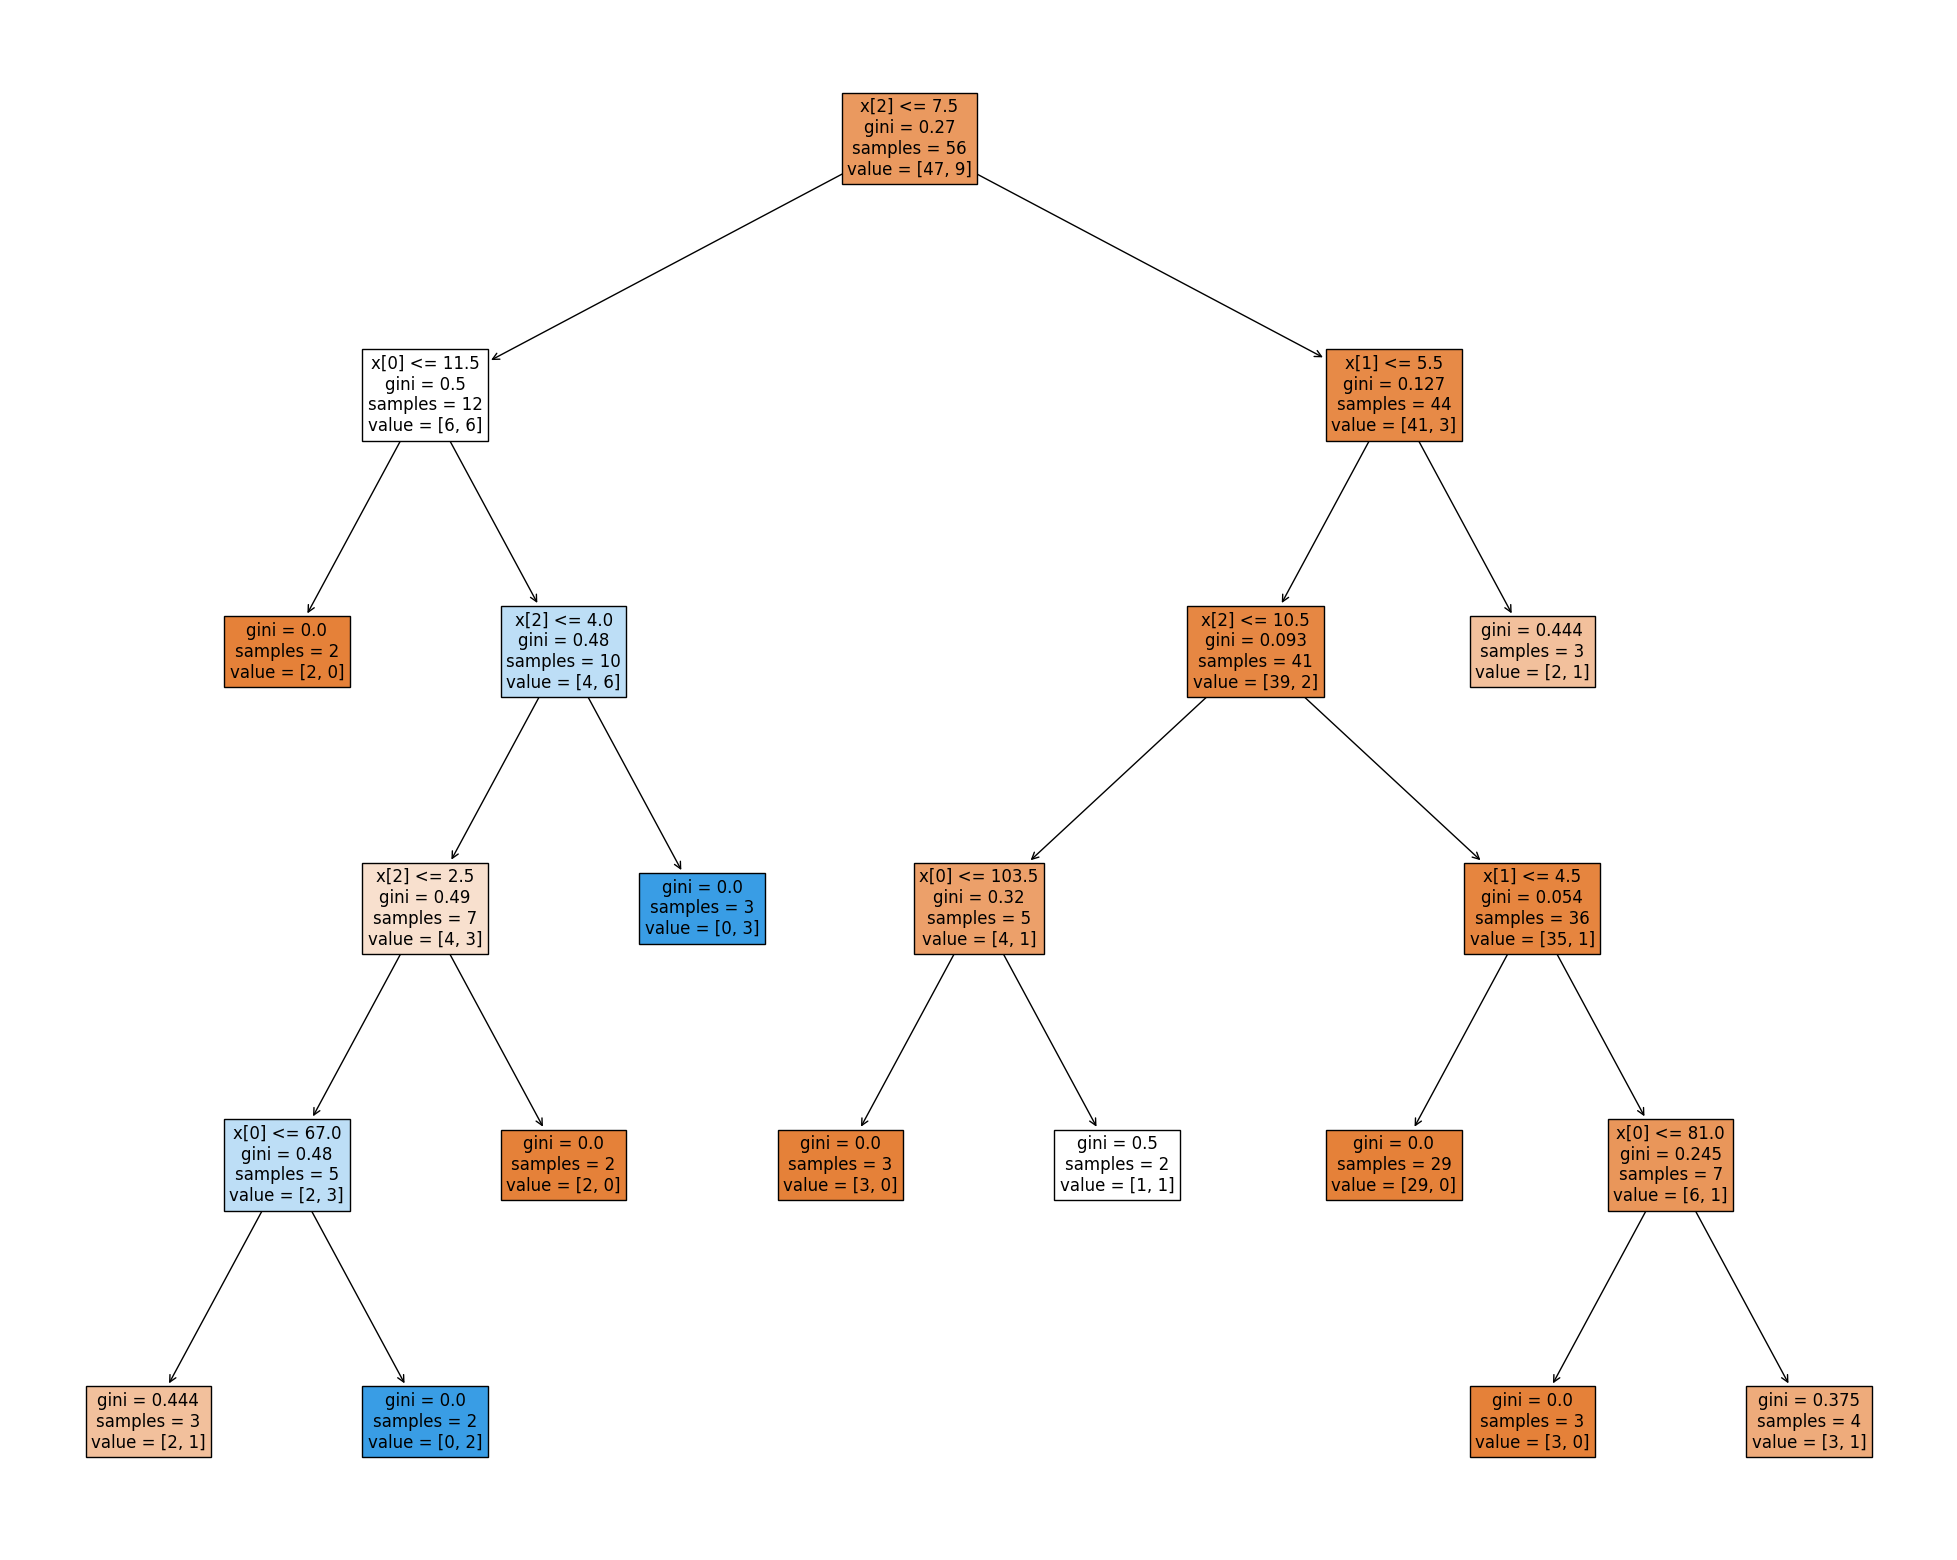

In [154]:
from sklearn import tree 
from matplotlib import pyplot as pyplot

fig = plt.figure(figsize=(25,20))
_=tree.plot_tree( clf,
                filled=True,
                fontsize=12)